In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train-chennai-sale.csv')

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


## UNDERSTANDING THE DATA
 <a id =0> </a>


<html>
<style>
html{font-family:Monaco;}

</style>
<h3 style = "font-family:Arial" >IN SALE_COND COLUMN:</h3>
    <strong>FAMILY</strong>: SELLLING HOUSE TO YOUR OWN FAMILY/KIN<br>
    <strong>PARTIAL</strong>: ONLY SELLING A PART OF THE HOUSE<br>
    <strong>ADJLAND</strong>: SELLING A NEABY LAND<br>
    <strong>NORMAL SALE</strong>: NORMAL SALE<br>
    <strong>ABNORMAL</strong>: IF ITS NONE OF THE ABOVE CONDITION<br>
</html>

<html>
<style>
h3{font-family:"Arial";}
</style>
<h3 >IN BUILD TYPE COLUMN:</h3>
    <strong>House</strong>: Normal House<br>
    <strong>Commercial</strong>: For Commercial Purposes<br>
    <strong>Others</strong>: Houses for other purposes<br>
</html>

<html>
<style>
h3{font-family:"Helvetica";}
</style>
<h3 >IN MZZONE COLUMN:</h3>
<strong>A</strong>: Agricultural<br>
<strong>I</strong>: Industrial<br>
<strong>C</strong>: Commercial<br>
<strong>RL</strong>: Residential Low Density<br>
<strong>RM</strong>: Residential Medium Density<br>
<strong>RH</strong>: Residential High Density
</html>

<html>
<style>
h3{font-family:"Arial";}
</style>
<h4 >IN PARK_FACIL COLUMN:</h4>Whether Parking Facility is available or not? (Yes/No)
<h4 >IN UTILITY_AVAIL COLUMN:</h4>What all facilites are availabe in the house...
<h4 >IN STREET COLUMN:</h4>Whether the road connected to the house is Paved, Gravel or has NO Acess
</html>

<span style = "font:Monaco">BEFORE I SELL THE HOUSE WOULD I KNOW THE REG_FEE AND COMMIS FEE?</span> <br>
<span style =" font-size: 16px">`OBVIOUSLY NO(REMOVE THE COLUMNS)`</span>

## DATA CLEANING/TRANSFORMATION

> 1. <SPAN style = "color:GREEN;font-size:15.5px">[CONVERTING COL HEADERS INTO `LOWER CASE`](#1)<SPAN><br>
> 2. <SPAN style = "color:GREEN;font-size:15.5px">[CLEANING AND TRANFORMING](#2)<SPAN><br>
    >> a. [CORRECTING SPELLING MISTAKES OF CATEGORICAL COLS](#2.1)<br>
    >> b. [FILLING NaN VALUES OF NUMERICAL COLS](#2.2)<br>
    >> c. [DROPPING THE DUPLICATE ROWS](#2.3)<br>
    >> d. [CHANGING THE TYPES](#2.4) <br>
> 3. <SPAN style = "color:GREEN;font-size:15.5px">[FINDING (Derived Feature) `house_age = date_sale - date_build`](#3)<SPAN><br>
> 4. <SPAN style = "color:GREEN;font-size:15.5px">[DROPPING `Prt_id(unique), Date_sale, Date_Built, Reg_fee & Commis`<SPAN> COLUMNS](#4)<br>

## EDA
> 1. <SPAN style = "color:GREEN;font-size:15.5px">[UNIVARIATE ANALYSIS](#21)<SPAN><BR>
> 2. <SPAN style = "color:GREEN;font-size:15.5px">[BIVARIATE ANALYSIS](#22)<SPAN>

## ENCODING
> 1. <SPAN style = "color:GREEN;font-size:15.5px">[ONE HOT ENCODING](#31)<SPAN><BR>
> 2. <SPAN style = "color:GREEN;font-size:15.5px">[LABEL ENCODING](#32)<SPAN>

## SPLITTING 
[click here](#4)

## SCALING 
> 1. <SPAN style = "color:GREEN;font-size:15.5px">[STANDARD SCALER](#5)<SPAN><BR>

## MODELLING 
> 1. [LINEAR REGRESSION](#6.1)<BR>
> 2. [KNN](#6.2)<BR>
> 3. [DECISION TREE](#6.3)<BR>
> 4. [RANDOM FOREST](#6.4)<BR>
> 5. [XGBOOST](#6.5)<BR>

## CONCLUSION
[click here](#8)

## DATA CLEANING/TRANSFORMATION

 <a id =1> </a>
<b style = "font-size:15.5px">STEP 1:</b> <i style = "color:blue;font-size:15.5px"> CONVERTING COL HEADERS INTO `LOWER CASE`<i><br>

In [5]:
#STEP 1
new_dict ={}
for i in df.columns:
    new_dict.update({i:i.lower()})
df = df.rename(columns=new_dict)

In [6]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price'],
      dtype='object')

 <a id =2> </a>
<b style = "font-size:16.5px">STEP 2:</b><i style = "color:blue;font-size:16.5px">  CLEANING AND TRANSFORMING COLS</i>

 <a id =2.1> </a>
 <b style = "font-size:15.5px">STEP 2a:</b><i style = "color:blue;font-size:15.5px">  CHECK FOR SPELLING MISTAKES IN THE CATEGORICAL COLS</i>

In [7]:
col_list =['area','sale_cond','park_facil','buildtype','utility_avail','street']
print("Printing unique value of the categorical columns: \n")
for i in col_list:
    print("{} column: {}\t\n".format(i,df[i].unique()))

Printing unique value of the categorical columns: 

area column: ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']	

sale_cond column: ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']	

park_facil column: ['Yes' 'No' 'Noo']	

buildtype column: ['Commercial' 'Others' 'Other' 'House' 'Comercial']	

utility_avail column: ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']	

street column: ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']	



In [8]:
#Correcting the spelling mistakes of the above columns
df['area'] = df.area.replace({'Karapakam':'Karapakkam','Anna Nagar':'AnnaNagar','Ana Nagar':'AnnaNagar','Ann Nagar':'AnnaNagar',\
                              'KK Nagar':'KKNagar','T Nagar':'TNagar',\
                              'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',\
                              'Velchery':'Velachery','Adyr':'Adyar'
                             })
df['sale_cond'] = df.sale_cond.replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand','Normal Sale':'NormalSale'})
df['park_facil'] = df.park_facil.replace({'Noo':'No'})
df['buildtype'] = df.buildtype.replace({'Other':'Others','Comercial':'Commercial'})
df['utility_avail'] = df.utility_avail.replace({'All Pub':'AllPub','NoSeWa':'NoSewr','NoSewr ':'NoSewr'})
df['street'] = df.street.replace({'No Access':'NoAccess','Pavd':'Paved'})

In [9]:
col_list =['area','sale_cond','park_facil','buildtype','utility_avail','street']
print("Printing unique value of the categorical columns: \n")
for i in col_list:
    print("{} column: {}\t\n".format(i,df[i].unique()))

Printing unique value of the categorical columns: 

area column: ['Karapakkam' 'AnnaNagar' 'Adyar' 'Velachery' 'Chrompet' 'KKNagar'
 'TNagar']	

sale_cond column: ['AbNormal' 'Family' 'Partial' 'AdjLand' 'NormalSale']	

park_facil column: ['Yes' 'No']	

buildtype column: ['Commercial' 'Others' 'House']	

utility_avail column: ['AllPub' 'ELO' 'NoSewr']	

street column: ['Paved' 'Gravel' 'NoAccess']	



 <a id =2.2> </a>
<b style = "font-size:16px">STEP 2b:</b><p style = "color:blue;"><strong style = "font-size:15.5px">FILLING NULL VALUES</strong><br><SPAN style = "font-size:14px"><i>1. Filling NULL values with mean for the numerical columns</i><br><i>2. Filling NULL values with mode for discrete numerical columns</i></SPAN></p>

In [10]:
df.isna().sum()


prt_id            0
area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
reg_fee           0
commis            0
sales_price       0
dtype: int64

In [11]:
df['n_bedroom'] =df['n_bedroom'].fillna(1)
df['n_bathroom'] =df['n_bathroom'].fillna(1)
df['qs_overall'] =df['qs_overall'].fillna(df['qs_overall'].mean())

In [12]:
df.isnull().sum()

prt_id           0
area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
dtype: int64

 <a id =2.3> </a>
<b style = "font-size:15.5px">STEP 2c:</b><i style = "font-family:Helvetica;color:blue;font-size:15.5px"> CHECKING FOR DUPLICATE ROWS AND DROPPING THEM</i>

In [13]:
df = df.drop_duplicates()
df.shape

(7109, 22)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7109 non-null   float64
 6   n_bathroom     7109 non-null   float64
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

 <a id =2.4> </a>
<b style = "font-size:15.5px">STEP 2d:</b><i style = "color:blue;font-size:15.5px">CONVERTING n_bathroom AND n_bedroom INTO INT DATATYPE</i>

In [15]:
df.n_bathroom = df.n_bathroom.astype('int64')
df.n_bedroom = df.n_bedroom.astype('int64')

 <a id =3> </a>
<b style = "font-size:15.5px">STEP 3:</b><i style = "color:blue;font-size:15.5px"> FINDING DERIVED FEATURE `house_age`</i>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7109 non-null   int64  
 6   n_bathroom     7109 non-null   int64  
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

<i style = "color:blue;font-size:14px">CONVERTING THE DATE COLUMNS INTO DATE TIME</i>

In [17]:
df['date_sale'] =pd.to_datetime(df['date_sale'])
df['date_build'] =pd.to_datetime(df['date_build']);

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

In [19]:
df['house_age']= np.round((df.date_sale - df.date_build).dt.days/365.25,2)

In [20]:
df['house_age']

0       43.89
1       10.99
2       19.58
3       21.98
4       29.57
        ...  
7104    49.12
7105     8.75
7106    28.62
7107    31.33
7108    43.97
Name: house_age, Length: 7109, dtype: float64

<b style = "font-size:15.5px">STEP 4:</b><i style = "color:blue;font-size:15.5px"> REMOVING THE EXTRA COLS</i>

In [21]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price', 'house_age'],
      dtype='object')

In [22]:
df.drop(['prt_id','date_sale','date_build','reg_fee', 'commis'],axis = 1,inplace = True)

In [23]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43.89
1,AnnaNagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10.99
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19.58
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21.98
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29.57


<i style = "color:blue;font-size:14px"> REORDERING THE INDEXES</i>

In [24]:
col_list = []
col_list = list(df.columns[:-2])+list(df.columns[-1:-3:-1])
df = df.reindex(columns = col_list)

In [25]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age,sales_price
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,43.89,7600000
1,AnnaNagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,10.99,21717770
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,19.58,13159200
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,21.98,9630290
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,29.57,7406250


In [26]:
df= df.rename(columns = {'house_age':'house_age(in years)'})

In [27]:
df.isna().sum()

area                   0
int_sqft               0
dist_mainroad          0
n_bedroom              0
n_bathroom             0
n_room                 0
sale_cond              0
park_facil             0
buildtype              0
utility_avail          0
street                 0
mzzone                 0
qs_rooms               0
qs_bathroom            0
qs_bedroom             0
qs_overall             0
house_age(in years)    0
sales_price            0
dtype: int64

## EDA

 <a id =21> </a>
<b style = "font-size:15.5px">STEP 1:</b><i style = "color:blue;font-size:15.5px"> UNIVARIATE ANALYSIS</i>

In [28]:
cat_columns =['area','n_bedroom','n_bathroom','n_room','sale_cond','park_facil','buildtype','utility_avail','street','mzzone']
numerical_columns = ['int_sqft','dist_mainroad','qs_rooms','qs_bathroom','qs_bedroom','qs_overall','house_age(in years)']

<i style = "color:blue;font-size:14px"> CATEGORICAL COLS UNIVARIATE ANALYSIS</i>

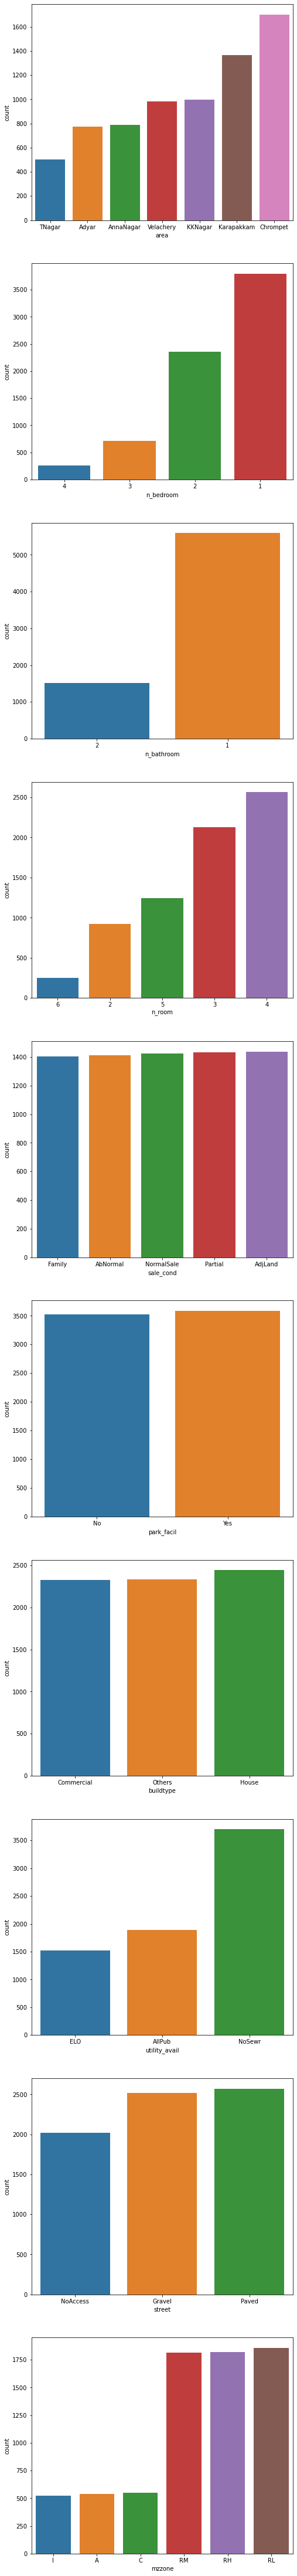

In [29]:
figure,axes = plt.subplots(len(cat_columns),1,figsize=(8,8*len(cat_columns)))
for index,i in enumerate(cat_columns):
    sns.countplot(ax=axes[index],x= i,data =df,order = df[i].value_counts().index[::-1])

<span style = "color: red"><b>Inferences from the above plot:</b></span>
<span style = "color: gray"><br>
1. Chrompet has most number of house while TNagar has the least.<br>
2. Houses with 1 bedroom is most preferred following by 2 bedrooms.<br>
3. Houses with 3 to 4 rooms is most preffered.<br>
4. Almost half of the houses doesn't have parking facility.<br>
5. 52% of houses does have no Sewer facility.<br>
6. 28% of houses doesn't have proper road access.<br>
7. Houses for Industrial,Agricultural and Commercial Purposes are very less.</span>

<i style = "color:blue;font-size:14px"> NUMERICAL COLS UNIVARIATE ANALYSIS</i>

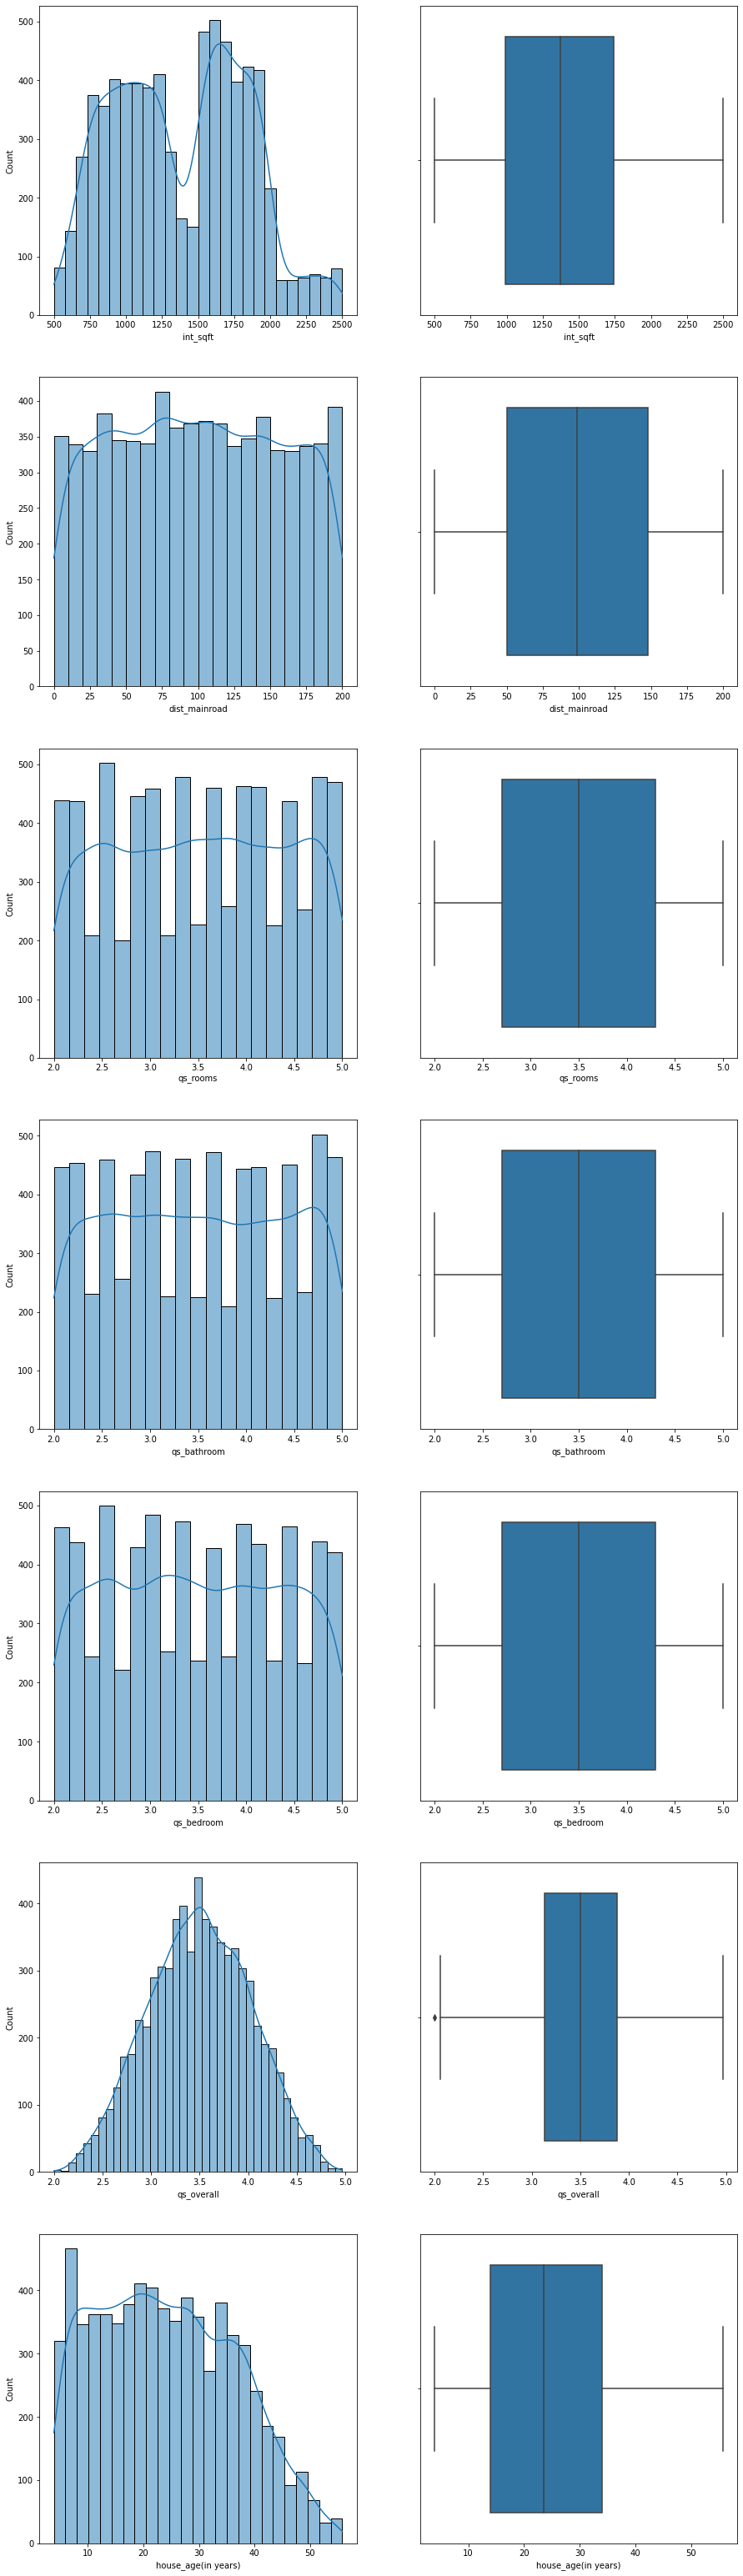

In [29]:
figure,axes = plt.subplots(len(numerical_columns),2,figsize=(15,8*len(numerical_columns)))
for index,i in enumerate(numerical_columns):
    sns.histplot(ax = axes[index][0],x=df[i],kde = True)
    sns.boxplot(ax = axes[index][1],x=df[i],orient = 'h')
    
    

Although qs_overall has an outlier but we cannot remove it, removing it may lead to pattern loss.

 <a id =22> </a>
<b style = "font-size:15.5px">STEP 2:</b><i style = "color:blue;font-size:15.5px"> BIVARIATE ANALYSIS</i>

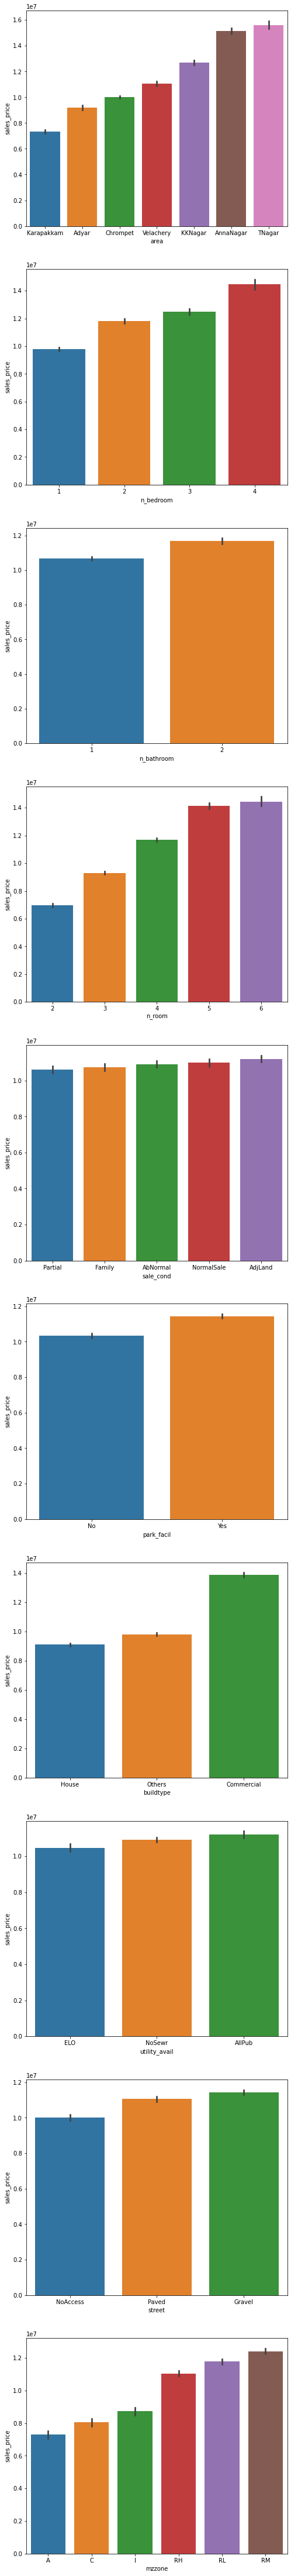

In [31]:
figure,axes = plt.subplots(len(cat_columns),1,figsize=(8,8*len(cat_columns)))
for index,i in enumerate(cat_columns):
    sns.barplot(ax=axes[index],x= i,y='sales_price',data =df,order = df.groupby(i)['sales_price'].mean().reset_index().sort_values('sales_price')[i])

No change needed: `n_bedroom`<BR>
Label Encoding: `area,park_facil,utility_avail,street,mzzone(0,1,2,4,5,6),n_bathroom,n_room(0,1,2,3,3)`<BR>
One Hot Encoding: `buildtyp`e<BR>
Drop: `sale_cond(it shows uniform relationship no relationship with target variable)`<BR>

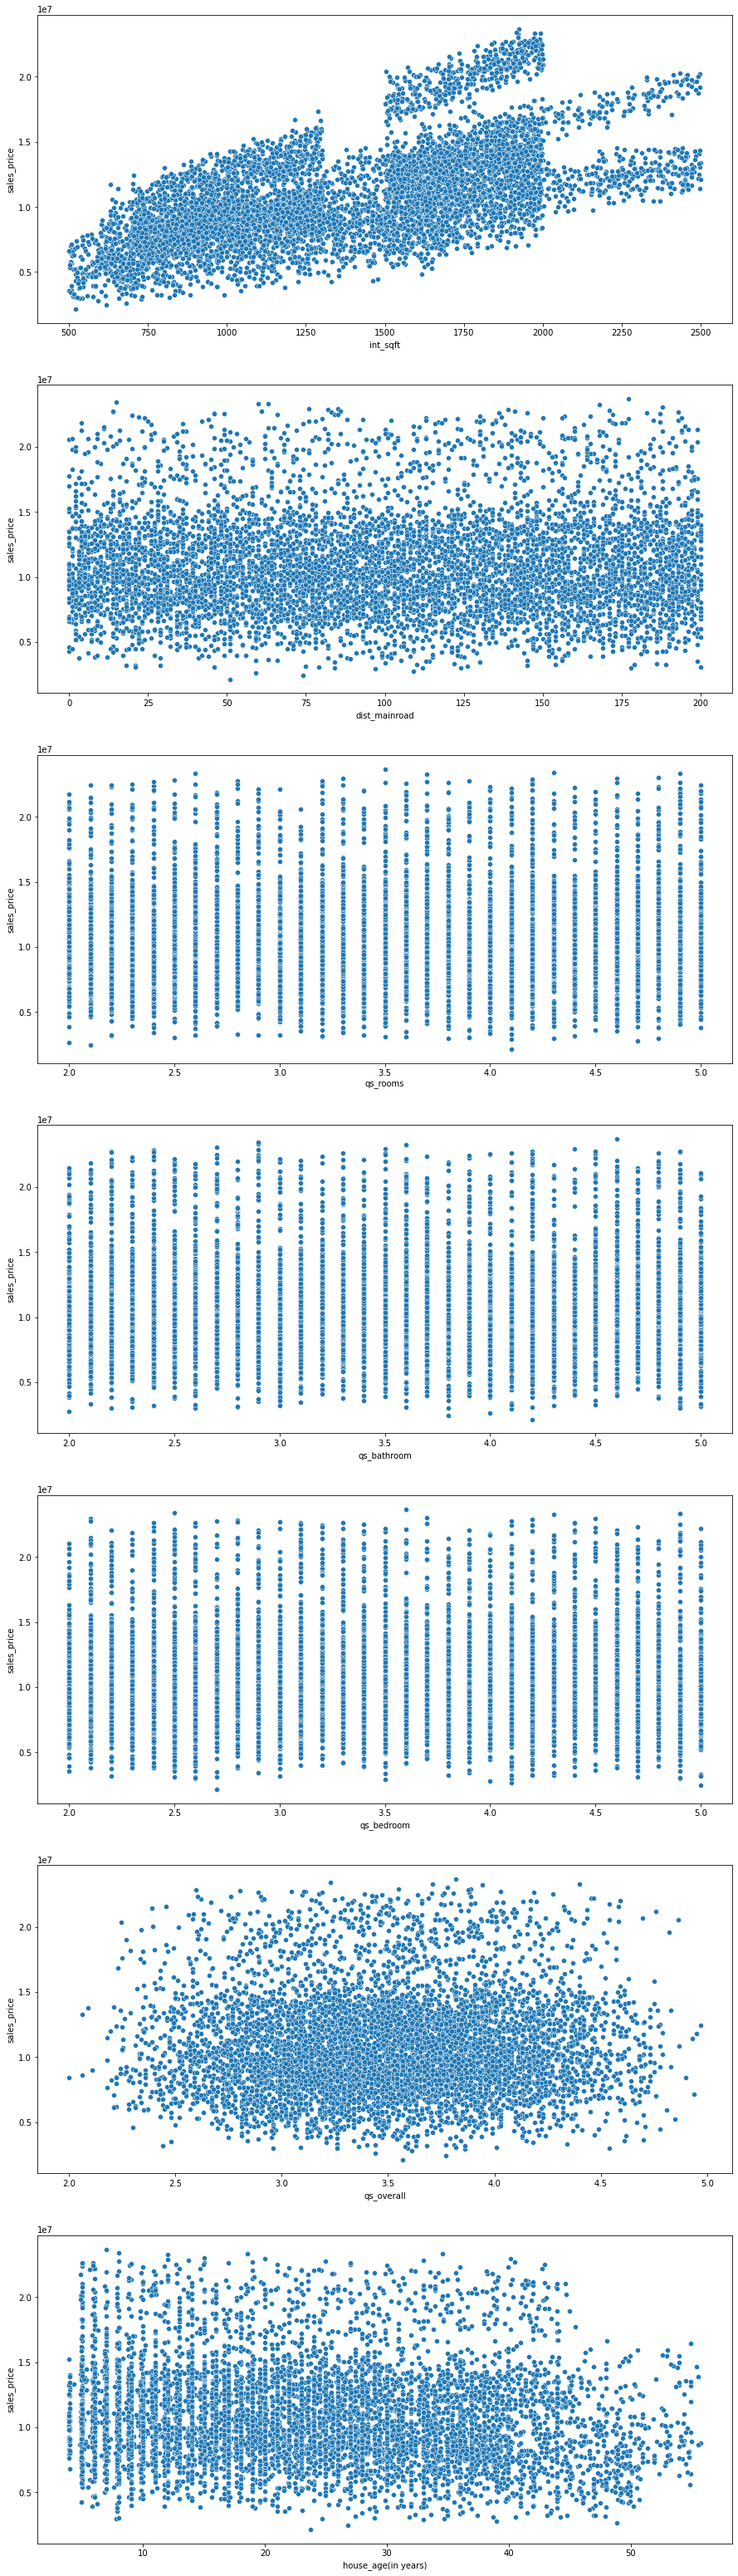

In [33]:
figure,axes = plt.subplots(len(numerical_columns),1,figsize=(15,8*len(numerical_columns)))
for index,i in enumerate(numerical_columns):
    sns.scatterplot(ax = axes[index],x=df[i],y=df['sales_price'])
    

<AxesSubplot:xlabel='qs_rooms'>

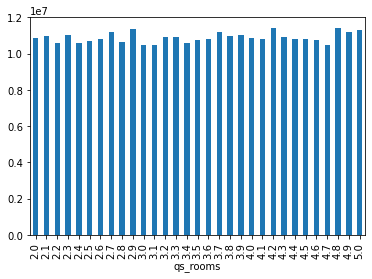

In [31]:
df.groupby('qs_rooms')['sales_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='qs_bedroom'>

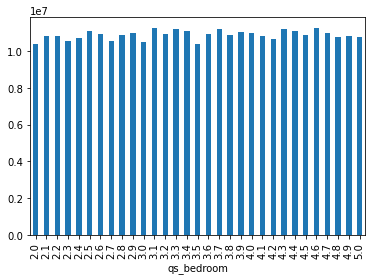

In [32]:
df.groupby('qs_bedroom')['sales_price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='qs_bathroom'>

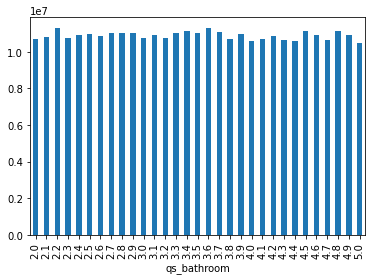

In [35]:
df.groupby('qs_bathroom')['sales_price'].mean().plot(kind = 'bar')

In [40]:
df['grp_house_age'] = pd.cut(df['house_age(in years)'],10)

<AxesSubplot:xlabel='grp_house_age'>

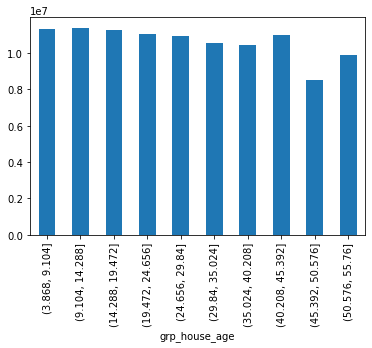

In [41]:
df.groupby('grp_house_age')['sales_price'].mean().plot(kind ='bar')

DROP QS_BEDROOM,QS_BATHROOM,QS_ROOMS,DIST_MAINROAD

## ENCODING

<i style = "color:blue;font-size:14px"> MAKING A BACKUP COPY</i>

In [43]:
data = df.copy(deep = False)

In [138]:
df1 = data.copy(deep = False)

In [45]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age(in years),sales_price,grp_house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,43.89,7600000,"(40.208, 45.392]"
1,AnnaNagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,10.99,21717770,"(9.104, 14.288]"
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,19.58,13159200,"(19.472, 24.656]"
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,21.98,9630290,"(19.472, 24.656]"
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,29.57,7406250,"(24.656, 29.84]"


 <a id =31> </a>
<b style = "font-size:15.5px">STEP 1:</b><i style = "color:blue;font-size:15.5px"> ONE HOT ENCODING</i>

In [46]:
#one hot encoding for build type column
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(drop = 'first')

In [47]:
build = pd.DataFrame(oh.fit_transform(df[['buildtype']]).toarray())

In [48]:
df['buildtype0'] = build.iloc[:,0]
df['buildtype1'] = build.iloc[:,1]

In [49]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,...,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age(in years),sales_price,grp_house_age,buildtype0,buildtype1
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,43.89,7600000,"(40.208, 45.392]",0.0,0.0
1,AnnaNagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,10.99,21717770,"(9.104, 14.288]",0.0,0.0
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.090,19.58,13159200,"(19.472, 24.656]",0.0,0.0
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,...,I,4.7,3.9,3.6,4.010,21.98,9630290,"(19.472, 24.656]",0.0,1.0
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,...,C,3.0,2.5,4.1,3.290,29.57,7406250,"(24.656, 29.84]",0.0,1.0


In [50]:
df['area'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

 <a id =32> </a>
<b style = "font-size:15.5px">STEP 2:</b><i style = "color:blue;font-size:15.5px"> LABEL ENCODING</i>

In [51]:
#label encoding 
df.area = df.area.map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,\
'KKNagar':4,'AnnaNagar':5,'TNagar':6
})
df.park_facil = df.park_facil.map({'Yes':1,'No':0})
df.utility_avail = df.utility_avail.map({'ELO':0,'NoSewr':1,"AllPub":2})
df.street = df.street.map({'NoAccess':0,'Paved':1,'Gravel':2})
df.mzzone = df.mzzone.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df.n_room = df.n_room.map({2:0,3:1,4:2,5:3,6:3})

In [52]:
# delete qs_bedroom,bathroom,room,distfrommainroad
df.drop(['sale_cond','buildtype','dist_mainroad','qs_rooms','qs_bathroom','qs_bedroom'],axis =1 ,inplace = True)
df.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,qs_overall,house_age(in years),sales_price,grp_house_age,buildtype0,buildtype1
0,0,1004,1,1,1,1,2,1,0,4.330,43.89,7600000,"(40.208, 45.392]",0.0,0.0
1,5,1986,2,1,3,0,2,2,4,3.765,10.99,21717770,"(9.104, 14.288]",0.0,0.0
2,1,909,1,1,1,1,0,2,5,3.090,19.58,13159200,"(19.472, 24.656]",0.0,0.0
3,3,1855,3,2,3,0,1,1,2,4.010,21.98,9630290,"(19.472, 24.656]",0.0,1.0
4,0,1226,1,1,1,1,2,2,1,3.290,29.57,7406250,"(24.656, 29.84]",0.0,1.0


 <a id =4> </a>
## SPLITTING

In [54]:
y = df['sales_price']
x = df.drop(['sales_price','grp_house_age'],axis =1) 

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 20)

 <a id =5> </a>
## SCALING

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
x_train= pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)

In [59]:
x_train

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,qs_overall,house_age(in years),buildtype0,buildtype1
0,-0.844066,-0.513836,-0.791773,-0.516597,-0.691736,0.995321,1.384644,-0.088278,0.484531,0.219354,1.190713,1.368888,-0.707107
1,-0.844066,-0.605813,-0.791773,-0.516597,-0.691736,0.995321,-0.063284,1.173413,-2.207250,0.047875,-0.024621,-0.730520,1.414214
2,1.308650,0.933694,0.456288,-0.516597,1.407691,-1.004701,-0.063284,-0.088278,-0.053826,0.810004,1.278275,-0.730520,1.414214
3,1.308650,0.668715,-0.791773,-0.516597,0.357978,-1.004701,-1.511212,-0.088278,-0.053826,-0.256976,-0.607560,-0.730520,-0.707107
4,1.846829,1.244661,0.456288,-0.516597,1.407691,0.995321,1.384644,-1.349970,1.022887,1.067222,-0.834574,1.368888,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,0.232292,0.815439,0.456288,-0.516597,0.357978,0.995321,-0.063284,1.173413,1.022887,1.476866,0.380760,1.368888,-0.707107
5327,-0.305887,-0.408721,-0.791773,-0.516597,-0.691736,0.995321,-0.063284,-1.349970,1.022887,-1.133424,-0.834574,-0.730520,1.414214
5328,1.846829,0.686234,-0.791773,-0.516597,0.357978,-1.004701,-1.511212,-0.088278,1.022887,-1.162004,-1.576422,-0.730520,-0.707107
5329,1.846829,0.931504,0.456288,-0.516597,1.407691,0.995321,-0.063284,-1.349970,1.022887,-1.476382,-1.239955,-0.730520,1.414214


 <a id =6> </a>
## MODELLING

In [127]:
from xgboost import plot_importance,XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [61]:
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score as cvs

In [62]:
# lr = LinearRegression()
# kn = KNeighborsRegressor() # check with weighted distnace and no of estimators
# gb = GaussianNB()
# sv = SVR() # change c value
# dt = DecisionTreeRegressor() #change the max depth
# rf = RandomForestRegressor()
# ab = AdaBoostRegressor()
# gr = GradientBoostingRegressor()
# xg = xg()

#### LINEAR REGRESSION
<a id =6.1> </a>

In [78]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print("Linear Regressor Training score: ",lr.score(x_train,y_train))
print("Linear Regressor Validation score: ",cvs(lr,x_train,y_train,cv=10,scoring = 'r2').mean()) ;

Linear Regressor Training score:  0.9129347733399702
Linear Regressor Validation score:  0.9120807004250727


In [65]:
lr.intercept_

10901346.838304259

In [66]:
#after scaling check the data

<AxesSubplot:>

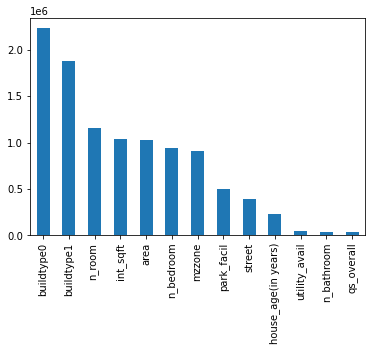

In [67]:
coef = pd.Series({i:abs(j) for i,j in zip(x_train.columns,lr.coef_)})
coef.sort_values(ascending = False).plot(kind = "bar")

In [100]:
'''
here there are separate feature imoportances values for buildtype0 and buildype1, 
what if we want the feature importances of the column buildtype?
''';

#### KNN
<a id =6.2> </a>

In [68]:
#KNN
for i in range(5,150):
    kn = KNeighborsRegressor(n_neighbors=i)
    kn.fit(x_train,y_train)
    print("Validation Score for {}th neighbour:".format(i),cvs(kn,x_train,y_train,cv = 10,scoring = 'r2').mean())

Validation Score for 5th neighbour: 0.9433452550196405
Validation Score for 6th neighbour: 0.9429536648151087
Validation Score for 7th neighbour: 0.9416094198839577
Validation Score for 8th neighbour: 0.9410856194476628
Validation Score for 9th neighbour: 0.940011492440607
Validation Score for 10th neighbour: 0.9382598160011316
Validation Score for 11th neighbour: 0.9373578870963006
Validation Score for 12th neighbour: 0.9360116631965797
Validation Score for 13th neighbour: 0.9352724918122819
Validation Score for 14th neighbour: 0.9341246044242674
Validation Score for 15th neighbour: 0.9332999051124119
Validation Score for 16th neighbour: 0.9319122104218229
Validation Score for 17th neighbour: 0.9303411799917086
Validation Score for 18th neighbour: 0.9293194274988679
Validation Score for 19th neighbour: 0.9282553060659421
Validation Score for 20th neighbour: 0.9268474252787955
Validation Score for 21th neighbour: 0.9255146567623891
Validation Score for 22th neighbour: 0.924115616728812

#### DECISION TREE
<a id =6.3> </a>

In [69]:
#DECISION TREE
dict = {}
for i in range(3,20):
    dt = DecisionTreeRegressor(max_depth = i)
    dt.fit(x_train,y_train)
    dict[i] = {'tr':dt.score(x_train,y_train),'te':cvs(dt,x_train,y_train,cv = 10).mean()}
    print("For maximum depth = ",i)
    print("Training Score:",dt.score(x_train,y_train))
    print("Validation Score:",cvs(dt,x_train,y_train,cv = 10).mean())


For maximum depth =  3
Training Score: 0.7010721695899176
Validation Score: 0.6966320027811806
For maximum depth =  4
Training Score: 0.8339277951480908
Validation Score: 0.8299397217061599
For maximum depth =  5
Training Score: 0.9066115141915843
Validation Score: 0.9005125229320404
For maximum depth =  6
Training Score: 0.9339269171216411
Validation Score: 0.924638420952142
For maximum depth =  7
Training Score: 0.9535170104005755
Validation Score: 0.9431017641985134
For maximum depth =  8
Training Score: 0.9689163364755079
Validation Score: 0.954305361497882
For maximum depth =  9
Training Score: 0.9806295671284723
Validation Score: 0.9617177159634434
For maximum depth =  10
Training Score: 0.9887077298815432
Validation Score: 0.9649869531713158
For maximum depth =  11
Training Score: 0.9940545463153821
Validation Score: 0.9667228914807376
For maximum depth =  12
Training Score: 0.9970034527642804
Validation Score: 0.9667240527845313
For maximum depth =  13
Training Score: 0.9985893

In [70]:
dtree = pd.DataFrame(dict).T.reset_index()

Text(0, 0.5, 'Training and Testing Scores')

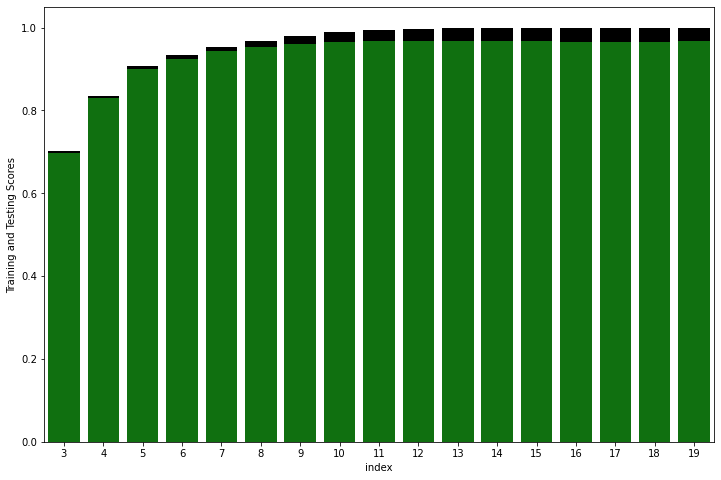

In [71]:
plt.figure(figsize = (12,8))
sns.barplot(data = dtree,y = "tr",x = "index",color = 'black')
sns.barplot(data = dtree,y = "te",x = "index",color = 'green')
plt.ylabel('Training and Testing Scores')

#### RANDOM FOREST
<a id =6.4> </a>

In [72]:
#RANDOM FOREST
dict = {}
for i in range(3,20):
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(x_train,y_train)
    dict[i] = {'tr':rf.score(x_train,y_train),'te':cvs(rf,x_test,y_test,cv =10 ).mean()}
    print("For maximum depth = ",i)
    print("Training Score:",rf.score(x_train,y_train))
    print("Validation Score:",cvs(rf,x_test,y_test,cv =10 ).mean())


For maximum depth =  3
Training Score: 0.7042949889818848
Validation Score: 0.7555248075155873
For maximum depth =  4
Training Score: 0.8437285822080071
Validation Score: 0.8650056225507197
For maximum depth =  5
Training Score: 0.9156761909830721
Validation Score: 0.924425144695254
For maximum depth =  6
Training Score: 0.9460970879751829
Validation Score: 0.9459597212924808
For maximum depth =  7
Training Score: 0.9670548002529871
Validation Score: 0.9598077683786373
For maximum depth =  8
Training Score: 0.9803491603749599
Validation Score: 0.967186804232281
For maximum depth =  9
Training Score: 0.9884627317134672
Validation Score: 0.9711696799236798
For maximum depth =  10
Training Score: 0.9931330235137376
Validation Score: 0.9732592229473799
For maximum depth =  11
Training Score: 0.9957684428293202
Validation Score: 0.9741114868274149
For maximum depth =  12
Training Score: 0.9970405113906813
Validation Score: 0.9743291108847327
For maximum depth =  13
Training Score: 0.9976102

In [73]:
rforest = pd.DataFrame(dict).T.reset_index()

Text(0, 0.5, 'Training and Testing Scores')

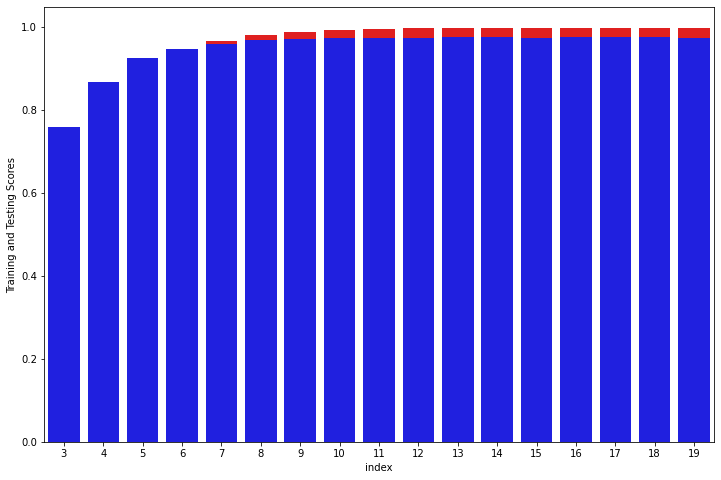

In [74]:
plt.figure(figsize = (12,8))
sns.barplot(data = rforest,y = "tr",x = "index",color = 'r')
sns.barplot(data = rforest,y = "te",x = "index",color = 'b')
plt.ylabel('Training and Testing Scores')

#### XGBOOST
<a id =6.5> </a>

In [116]:
#xgboost
xg = XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 123,)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [121]:
print("Training Score:",xg.score(x_test,y_test))
print("Validation Score:",cvs(xg,x_train,y_train,cv=10).mean())
print("Validation Score testing:",cvs(xg,x_test,y_test,cv=10).mean())

Training Score: -2.317104557479477
Validation Score: 0.9908182200375691
Validation Score testing: 0.9846781469978454


In [107]:
dict ={}
for i in np.arange(0.01,2,0.05):
    xg = XGBRegressor(n_estimators = 100,learning_rate = i)
    xg.fit(x_train, y_train)
    print("Learning Rate:{}".format(i))
#     print("Training Score:",xg.score(x_test,y_test))
    dict[i] = cvs(xg,x_train,y_train,cv=10).mean()
    print("Validation Score:",cvs(xg,x_train,y_train,cv=10).mean())


Learning Rate:0.01
Validation Score: -0.34246872755120294
Learning Rate:0.060000000000000005
Validation Score: 0.9905181664031376
Learning Rate:0.11
Validation Score: 0.9931230503149251
Learning Rate:0.16000000000000003
Validation Score: 0.9932117090233703
Learning Rate:0.21000000000000002
Validation Score: 0.9928050592391473
Learning Rate:0.26
Validation Score: 0.9923103920100335
Learning Rate:0.31000000000000005
Validation Score: 0.9913101212643038
Learning Rate:0.36000000000000004
Validation Score: 0.9906639893368073
Learning Rate:0.41000000000000003
Validation Score: 0.9898141321956473
Learning Rate:0.46
Validation Score: 0.988525092472331
Learning Rate:0.51
Validation Score: 0.9874993143151565
Learning Rate:0.56
Validation Score: 0.9862257801889591
Learning Rate:0.6100000000000001
Validation Score: 0.9848252745805471
Learning Rate:0.66
Validation Score: 0.9836703868903666
Learning Rate:0.7100000000000001
Validation Score: 0.982100995497538
Learning Rate:0.76
Validation Score: 0.98

In [113]:
#finding the highest score 
dict
li = []
for i,j in dict.items():
    if len(li) == 0:
        li.extend([i,j])
    elif dict[i] > li[1]:
        li[0] = i
        li[1] = dict[i]
print(li)

[0.16000000000000003, 0.9932117090233703]


In [125]:
dict ={}
lis = [0.0001,0.001,0.11,2]
for i in np.arange(0.01,0.4,0.01):
    xg = XGBRegressor(n_estimators = 200,learning_rate = i)
    xg.fit(x_train, y_train)
    print("Learning Rate:{}".format(i))
#     print("Training Score:",xg.score(x_test,y_test))
    dict[i] = cvs(xg,x_train,y_train,cv=10).mean()
    print("Validation Score:",cvs(xg,x_train,y_train,cv=10,scoring = 'r2').mean())
#finding the highest score 
li = []
for i,j in dict.items():
    if len(li) == 0:
        li.extend([i,j])
    elif dict[i] > li[1]:
        li[0] = i
        li[1] = dict[i]
print("The best score for XGBoost is {} for learning rate:{}".format(li[1],li[0]))


Learning Rate:0.01
Validation Score: 0.7870009646613582
Learning Rate:0.02
Validation Score: 0.9818203275966646
Learning Rate:0.03
Validation Score: 0.9906091066458245
Learning Rate:0.04
Validation Score: 0.992483880407294
Learning Rate:0.05
Validation Score: 0.9932256339387688
Learning Rate:0.060000000000000005
Validation Score: 0.9934858789343453
Learning Rate:0.06999999999999999
Validation Score: 0.9935638316891506
Learning Rate:0.08
Validation Score: 0.9936181871059319
Learning Rate:0.09
Validation Score: 0.993621453335237
Learning Rate:0.09999999999999999
Validation Score: 0.9937583502868488
Learning Rate:0.11
Validation Score: 0.9936054093588623
Learning Rate:0.12
Validation Score: 0.9937046136923188
Learning Rate:0.13
Validation Score: 0.9934808905545955
Learning Rate:0.14
Validation Score: 0.9934939218817771
Learning Rate:0.15000000000000002
Validation Score: 0.9934915394085945
Learning Rate:0.16
Validation Score: 0.9933042916547326
Learning Rate:0.17
Validation Score: 0.993168

In [126]:
xg = XGBRegressor(n_estimators = 200,learning_rate = 0.09999999999999999)
xg.fit(x_train, y_train)
# print("Training Score:",xg.score(x_test,y_test))
print("Validation Score:",cvs(xg,x_train,y_train,cv=10,scoring = 'r2').mean())

Validation Score: 0.9937583502868488


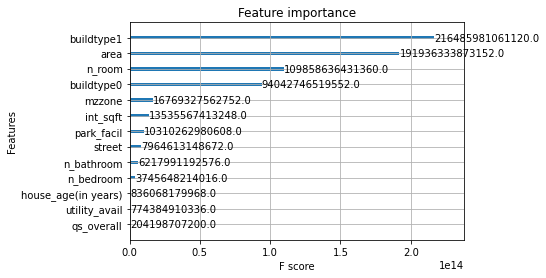

In [129]:
plot_importance(xg, importance_type = 'gain') # other options available
plt.show()

 <a id =6> </a>
## CONCLUSION

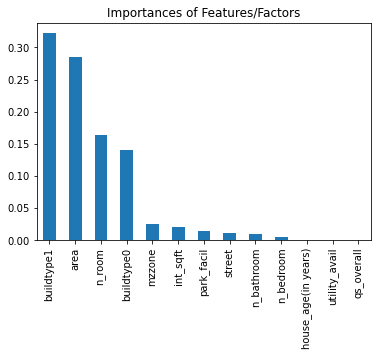

In [145]:
coef = pd.Series({i:abs(j) for i,j in zip(x_train.columns,xg.feature_importances_)})
coef.sort_values(ascending = False).plot(kind = "bar")
plt.title('Importances of Features/Factors');
plt.show()

In [150]:
coef['buildtype'] = (coef['buildtype0']*coef['buildtype1']/(coef['buildtype0']+coef['buildtype1']))

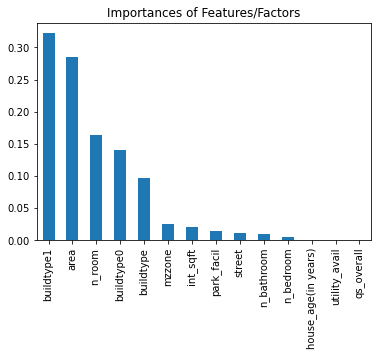

In [151]:
coef.sort_values(ascending = False).plot(kind = "bar")
plt.title('Importances of Features/Factors');
plt.show()

### It is quite evident from the graph that `AREA,N_ROOM` are the important factors that decide the sale of Houses

[go to the top](#0)

<i>Below are the graphs of AREA AND N_ROOM Vs. Sales Price </i>

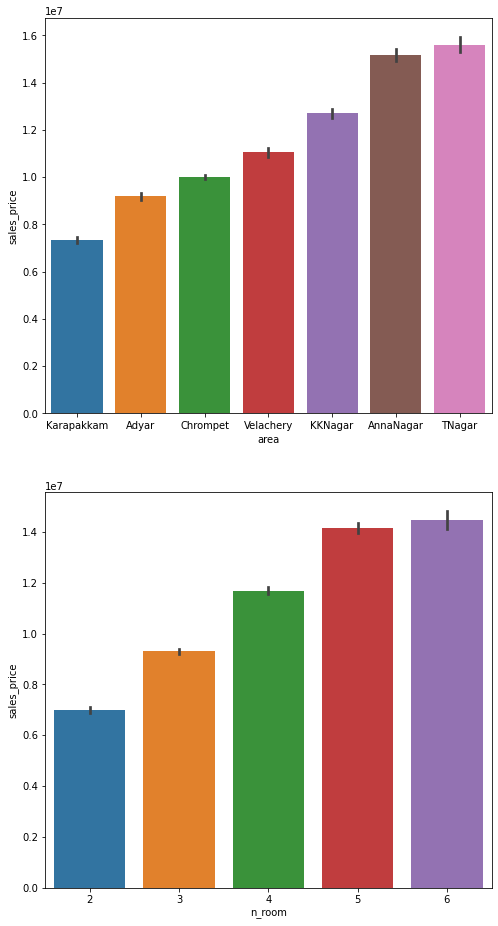

In [155]:
cat_columns =['area','n_room']
figure,axes = plt.subplots(len(cat_columns),1,figsize=(8,8*len(cat_columns)))
for index,i in enumerate(cat_columns):
    sns.barplot(ax=axes[index],x= i,y='sales_price',data = data ,order = data.groupby(i)['sales_price'].mean().reset_index().sort_values('sales_price')[i])

[go to the top](#0)